In [67]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#A simple 2D dataset
twoD_dataset = [(1,1),(1.5,2),(3.9,4.0),(5.0,7.0),(1.0,2.0),(3.5,5.0),(4.5,5.0),(3.5,4.5),(1.7,2.1),(0.7,1.2),(4.3,5.5),(4.5,6.0)]
X = [i[0] for i in twoD_dataset]
Y = [i[1] for i in twoD_dataset]

In [69]:
def best_from_dict(d):
    '''
    The function returns the closest centroid key
    '''
    prev_key = None
    prev = np.inf
    for key,value in d.items():
        if value < prev:
            prev_key = key
            prev = value
    return prev_key

In [70]:
def get_clusters(no,data):
    '''
    It takes the number of clusters and data and returns the cluster groups
    '''
    f_list = dict()
    new_list = dict()
    for i in range(no):
        f_list[data[i]] = []
        new_list[data[i]] = []
    
    count = 0
    while True:
        count += 1
        for j in data:
            dist = dict()
            for k in new_list.keys():
                dist[k] = np.linalg.norm(np.array(k)-np.array(j))
            new_list[best_from_dict(dist)].append(j)
            
        tempt_dict = dict()
        
        for i in new_list.values():
            #Redeclaring the centroids
            average = tuple([sum(x)/len(x) for x in zip(*i)])
            tempt_dict[average] = i
            
        #Checking for convergence
        new_list = tempt_dict
        print(f"Iteration {count}")
        for centroids,points in new_list.items():
            print("Centroid:",centroids ,"\nPoints:")
            for i in points:
                print(i)
            print("\n\n")
        if new_list == f_list:
            break
        else:
            #Setting final list
            f_list = new_list
            
            for i in new_list.keys():
                #Resetting new list
                new_list[i] = []            
    return f_list

In [71]:
#Getting the results
clusters = get_clusters(3,twoD_dataset)

#Displaying the results'
print("\n\nFINAL RESULT :- \n")
for centroids,points in clusters.items():
    print("Centroid:",centroids ,"\nPoints:")
    for i in points:
        print(i)
    print("\n")

Iteration 1
Centroid: (0.85, 1.1) 
Points:
(1, 1)
(0.7, 1.2)



Centroid: (1.4000000000000001, 2.033333333333333) 
Points:
(1.5, 2)
(1.0, 2.0)
(1.7, 2.1)



Centroid: (4.171428571428572, 5.285714285714286) 
Points:
(3.9, 4.0)
(5.0, 7.0)
(3.5, 5.0)
(4.5, 5.0)
(3.5, 4.5)
(4.3, 5.5)
(4.5, 6.0)



Iteration 2
Centroid: (0.85, 1.1) 
Points:
(1, 1)
(0.7, 1.2)



Centroid: (1.4000000000000001, 2.033333333333333) 
Points:
(1.5, 2)
(1.0, 2.0)
(1.7, 2.1)



Centroid: (4.171428571428572, 5.285714285714286) 
Points:
(3.9, 4.0)
(5.0, 7.0)
(3.5, 5.0)
(4.5, 5.0)
(3.5, 4.5)
(4.3, 5.5)
(4.5, 6.0)





FINAL RESULT :- 

Centroid: (0.85, 1.1) 
Points:
(1, 1)
(0.7, 1.2)


Centroid: (1.4000000000000001, 2.033333333333333) 
Points:
(1.5, 2)
(1.0, 2.0)
(1.7, 2.1)


Centroid: (4.171428571428572, 5.285714285714286) 
Points:
(3.9, 4.0)
(5.0, 7.0)
(3.5, 5.0)
(4.5, 5.0)
(3.5, 4.5)
(4.3, 5.5)
(4.5, 6.0)




Text(0.5, 1.0, 'K-Means')

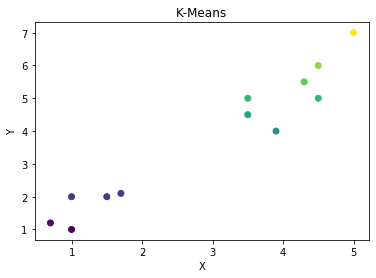

In [72]:
plt.scatter(X,Y,c=Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means')